In [1]:
import pandas as pd

In [2]:
df_data = pd.read_csv("/kaggle/input/imdb-title-with-person-name/final_rating_table/final_rating_table.tsv",sep='\t')
df_data.head()

,tconst,averageRating,language,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,director,editor,writer,actor_actress
0,tt0000005,6.2,en,short,Blacksmith Scene,0,1893,1,"Comedy,Short",william k.l. dickson,Unknown,Unknown,"charles kayser,john ott"
1,tt0000010,6.9,sv,short,Leaving the Factory,0,1895,1,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
2,tt0000012,7.4,tr,short,The Arrival of a Train,0,1896,1,"Documentary,Short","auguste lumière,louis lumière",Unknown,Unknown,Unknown
3,tt0000013,5.7,en,short,The Photographical Congress Arrives in Lyon,0,1895,1,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
4,tt0000014,7.1,sv,short,The Waterer Watered,0,1895,1,"Comedy,Short",louis lumière,Unknown,Unknown,"françois clerc,benoît duval"


In [3]:
df_data.shape

(258027, 13)

In [3]:
df_data['isAdult'] = pd.to_numeric(df_data['isAdult'], errors='coerce')
df_data['runtimeMinutes'] = pd.to_numeric(df_data['runtimeMinutes'], errors='coerce')
df_data['averageRating'] = pd.to_numeric(df_data['averageRating'], errors='coerce')
df_data.head()

,tconst,averageRating,language,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,director,editor,writer,actor_actress
0,tt0000005,6.2,en,short,Blacksmith Scene,0,1893,1.0,"Comedy,Short",william k.l. dickson,Unknown,Unknown,"charles kayser,john ott"
1,tt0000010,6.9,sv,short,Leaving the Factory,0,1895,1.0,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
2,tt0000012,7.4,tr,short,The Arrival of a Train,0,1896,1.0,"Documentary,Short","auguste lumière,louis lumière",Unknown,Unknown,Unknown
3,tt0000013,5.7,en,short,The Photographical Congress Arrives in Lyon,0,1895,1.0,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
4,tt0000014,7.1,sv,short,The Waterer Watered,0,1895,1.0,"Comedy,Short",louis lumière,Unknown,Unknown,"françois clerc,benoît duval"


In [4]:
df_data['startYear'] = pd.to_datetime(df_data['startYear'], format='%Y', errors='coerce')
df_data.head()

,tconst,averageRating,language,titleType,primaryTitle,isAdult,startYear,runtimeMinutes,genres,director,editor,writer,actor_actress
0,tt0000005,6.2,en,short,Blacksmith Scene,0,1893-01-01,1.0,"Comedy,Short",william k.l. dickson,Unknown,Unknown,"charles kayser,john ott"
1,tt0000010,6.9,sv,short,Leaving the Factory,0,1895-01-01,1.0,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
2,tt0000012,7.4,tr,short,The Arrival of a Train,0,1896-01-01,1.0,"Documentary,Short","auguste lumière,louis lumière",Unknown,Unknown,Unknown
3,tt0000013,5.7,en,short,The Photographical Congress Arrives in Lyon,0,1895-01-01,1.0,"Documentary,Short",louis lumière,Unknown,Unknown,Unknown
4,tt0000014,7.1,sv,short,The Waterer Watered,0,1895-01-01,1.0,"Comedy,Short",louis lumière,Unknown,Unknown,"françois clerc,benoît duval"


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df_encoded=pd.get_dummies(df_data, columns=['language', 'titleType', 'startYear', 'genres', 'director', 'editor', 'writer', 'actor_actress'])

In [13]:
X = df_encoded[['language', 'titleType', 'isAdult','startYear', 'runtimeMinutes', 'genres', 'director', 'editor', 'writer', 'actor_actress']]
y = df_encoded['averageRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'df_encoded' is not defined

In [10]:
# Initialize and train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predict IMDb ratings on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

ValueError: could not convert string to float: 'hr'

In [4]:
import matplotlib.pyplot as plt


In [25]:
ratings_count = df_data['titleType'].value_counts().sort_index()

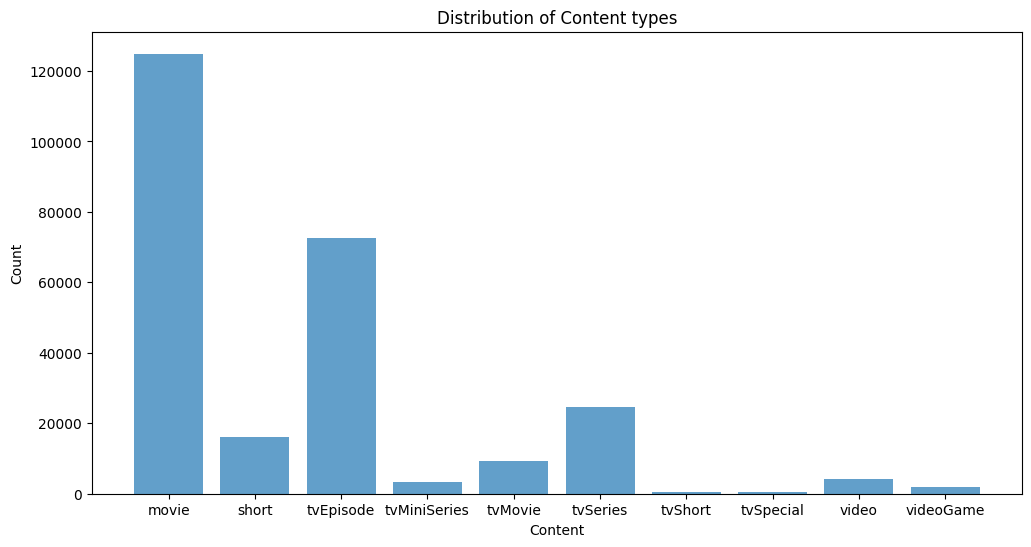

In [33]:
# Extract the unique ratings as x-axis labels
ratings = ratings_count.index

# Count of each rating as y-values
count = ratings_count.values
plt.figure(figsize=(12, 6))

# Create a bar chart
plt.bar(ratings, count, align='center', alpha=0.7)

# Add labels and a title
plt.xlabel('Content')
plt.ylabel('Count')
plt.title('Distribution of Content types')

# Show the chart
plt.show()


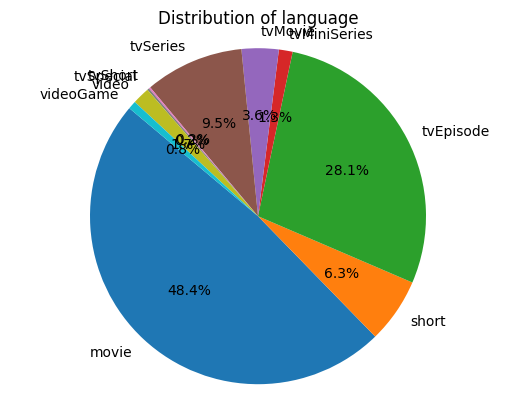

In [24]:
is_Adult = df_data['titleType'].value_counts().sort_index()
# Extract the unique ratings as x-axis labels
# Labels for each rating
labels = is_Adult.index.astype(str)

# Count of each rating
sizes = is_Adult.values

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of language')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the chart
plt.show()
